Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
dict_keys([np.str_('B01'), np.str_('B02'), np.str_('B03'), np.str_('B04'), np.str_('B05'), np.str_('B06'), np.str_('B07'), np.str_('B08'), np.str_('B8A'), np.str_('B09'), np.str_('B11'), np.str_('B12')])


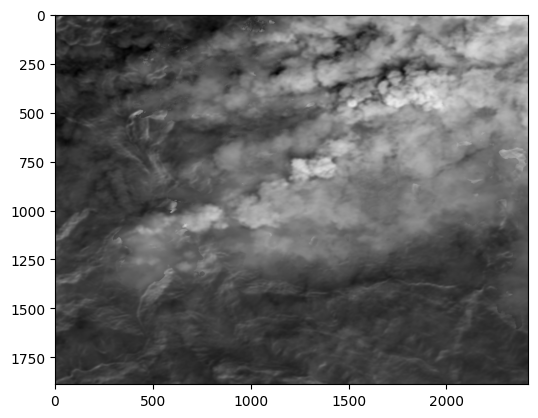

In [9]:
#Brændende pixels
#Hent dataen fra givet fil

from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Hent alle tiff filer i en mappen med billeder
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/FysikCamp2025/Raket og Jordobservationer/brand/"
# Åben alle rå tiff filer og gem i Bands array
Data = {}

filename_begin = "2021-08-17-00_00_2021-08-17-23_59_Sentinel-2_L2A_"
filename_end = "_(Raw).tiff"
filenames = np.array(["B01", "B02", "B03", "B04", "B05", "B06", "B07",
                   "B08", "B8A","B09", "B11", "B12"])
for i in range(12):
    #Hent alle tiff filer i bands
    filename = filename_begin + filenames[i] + filename_end

    band = Image.open(path+filename)
    Data[filenames[i]] = np.array(band)
    band.close()

print(Data.keys())


plt.imshow(Data["B01"], cmap='gray')

## Nu skal vi finde de brændende pixels.
### Først skal vi prøve at finde sammenhænge imellem båndene så vi kan se hvordan vi kan sortere pixelene.
#### Ændre band1 og band2


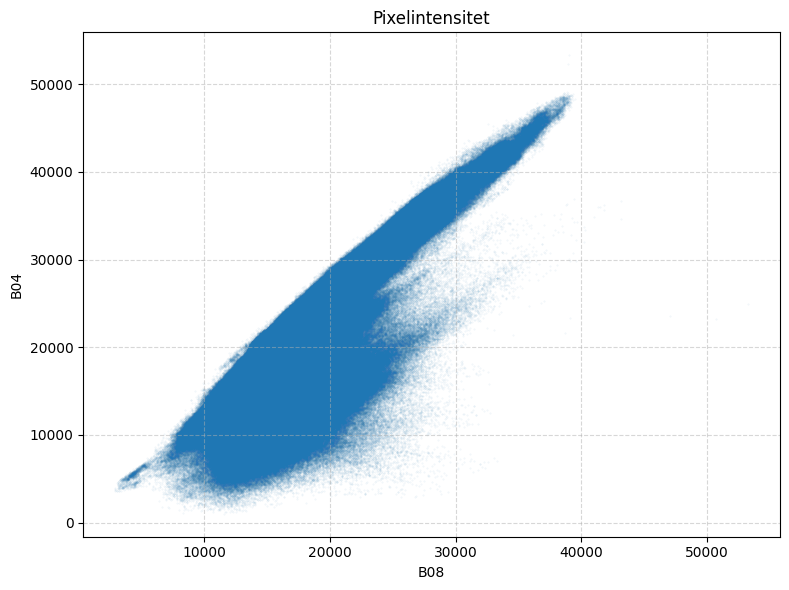

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
# Plot intensitet
#Vælg bånd
band1 = "B08"
band2 = "B04"
ax.scatter(Data[band1].flatten(), Data[band2].flatten(),alpha=0.1,s=0.1)

ax.set_title("Pixelintensitet")
ax.set_xlabel(band1)
ax.set_ylabel(band2)
# tilføj et grid
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Nu laver vi en maske og putter på billedet.
Nu ændrer vi pixel værdier som går fra 0 til 65535.

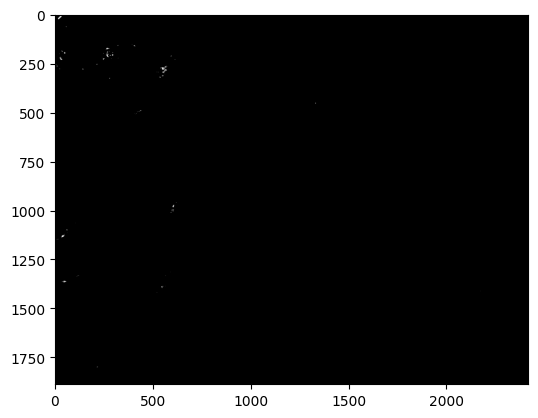

In [11]:
#Nu Laver vi en maske.
mask1 = Data["B04"] < 30000
mask2 = Data["B08"] > 30000


#Kombiner maskerne og lav en ny maske kun måske hvor begge er sande, i en ny maske
mask = mask1 & mask2
plt.imshow(mask, cmap='gray')
plt.show()


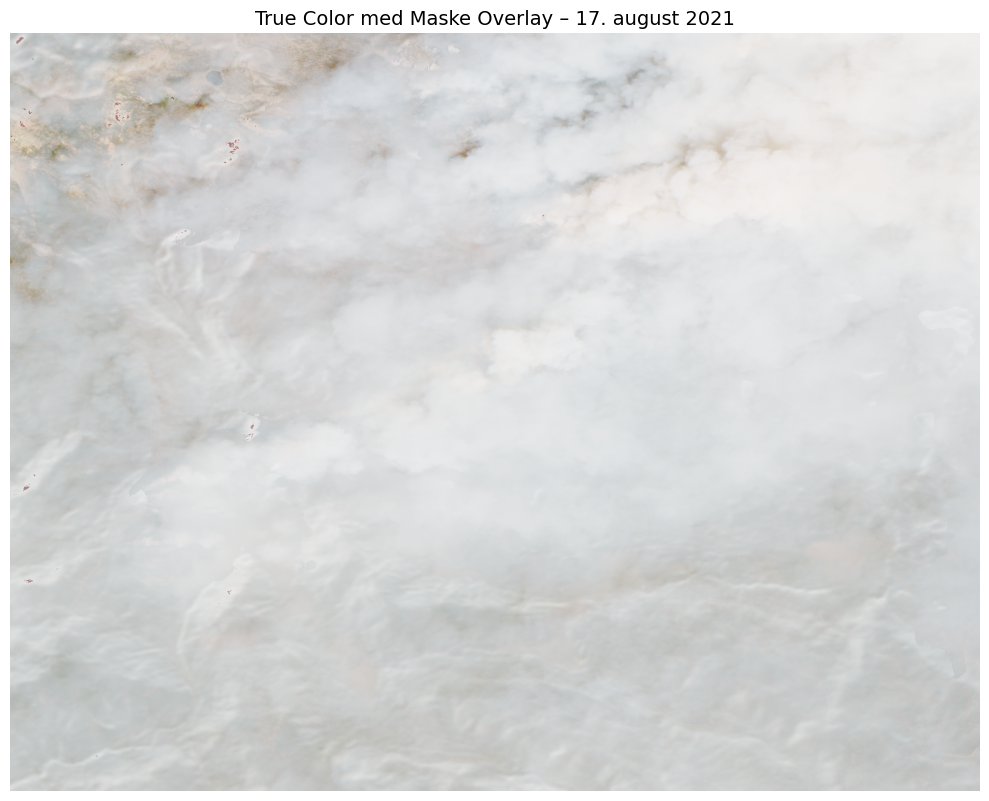

In [12]:
# Indlæs True Color billedet
true_color_img = Image.open(path+"2021-08-17-00_00_2021-08-17-23_59_Sentinel-2_L2A_True_color.tiff")
true_color_array = np.array(true_color_img)

# Lav plottet
fig, ax = plt.subplots(figsize=(10, 10))

# Vis True Color billedet
ax.imshow(true_color_array)

# Læg masken ovenpå i rød med gennemsigtighed
ax.imshow(mask, cmap='Reds', alpha=0.4)

# Fjern aksetiketter for et rent billede
ax.axis('off')

# Titel
ax.set_title("True Color med Maske Overlay – 17. august 2021", fontsize=14)

plt.tight_layout()
plt.show()
